# Results of Edge Detection Benchmark and Speedup

### By: Alexis Morse

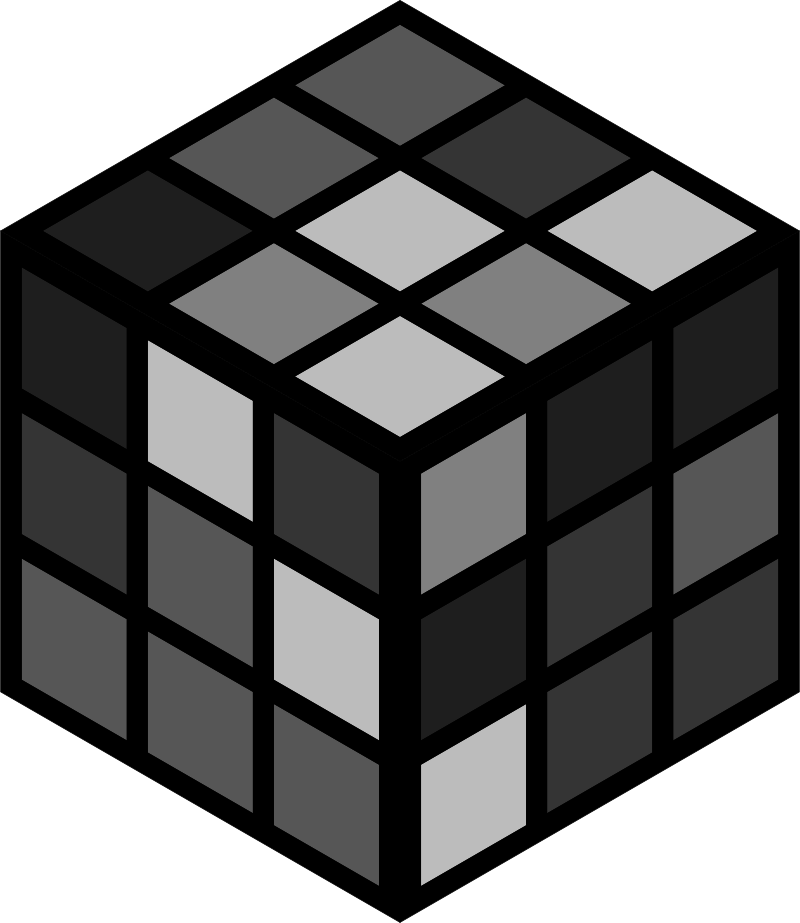

## Serial Experiment

I compiled the serial code on HP Pavillion Windows 11 using the following commands:

module load GNU/5.4.0-2.26  OpenMPI/1.10.3

module load libpng/1.6.24

**3 options in Makefile:**

My base image test is with **cube.png** because if I use different images, the the run time is different
    
***Running regular code***

    make test1
    make clean1
    
***Running with -Ofast***    
    
    make test2
    make clean2
    
***Running with schedule(static)***

    make test3
    make clean3


#### Code that allows for the time test

`#include <time.h>`

`clock_t start, end;
double total;
clock_t begin = clock();`

`clock_t end = clock();
double time = double(end-begin)/CLOCKS_PER_SEC;
printf(time);`

--------------------------------------------------------------------------------------------

### Serial Testing

In ran the code 10 times on OnDemand MSU HPCC and obtained the following results

The average run time is 0.192


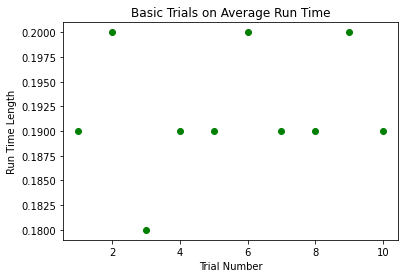

In [1]:
import matplotlib.pyplot as plt
from statistics import mean
times = [0.190000, 0.200000, 0.180000, 0.190000, 0.190000, 0.200000, 0.190000, 0.190000, 0.200000, 0.190000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times, c = 'green')
plt.title("Basic Trials on Average Run Time")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {}".format(mean(times)))

## Code Optimization

The first way to optimize your code is to 

* Use the compiler flag -O1 on the main_process.c file

`gcc -O1 -c  main_process.c`

The second way to optimize your code is to use another flag similar to the one above

* Use the compiler flag -Ofast on the main_process.c file

`gcc -Ofast -c  main_process.c`

* Use the compiler flag -march=native

`gcc -march=native -c main_process.c`

* Use the compiler flag -march=athlon64

`gcc -march=athlon64 -c main_process.c`

* Change order of loops in function process_img, rows comes first, this is the *optimized serial version*

`for(int r=0;r<sz.height;r++)
	    for(int c=0;c<sz.width;c++)` 

* I wanted to see if there would be any bottleneck issues in the code so I added the following code to inspect the efficiency of the program using gprof and I learned that the coding taking up the most time was the function process_img. I researched ways to optimize the code however, it seems that most of the code is created using optimization coding techniques

`gcc -pg -c main_process.c`


` gprof process gmon.out > analysis.txt`


Show your timing results as either a table or a graph.

#### Option 1 Time Graph

The average run time is 0.06 seconds


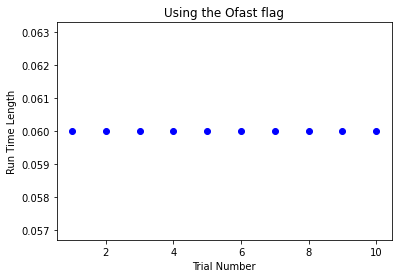

In [2]:
times01 = [0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times01, c = 'blue')
plt.title("Using the Ofast flag")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times01)))

#### Option 2 Time Graph

The average run time is 0.07 seconds


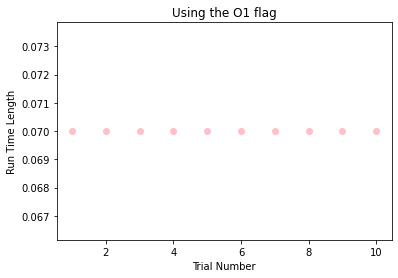

In [3]:
times01 = [0.070000, 0.070000, 0.070000, 0.070000, 0.070000, 0.070000, 0.070000, 0.070000, 0.070000, 0.070000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times01, c = 'pink')
plt.title("Using the O1 flag")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times01)))

#### Option 3 Time Graph

The average run time is 0.193 seconds


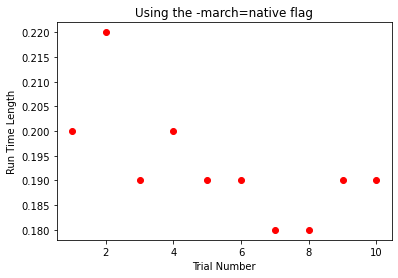

In [4]:
times_marchn = [0.200000, 0.220000, 0.190000, 0.200000, 0.190000, 0.190000, 0.180000, 0.180000, 0.190000, 0.190000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_marchn, c = 'red')
plt.title("Using the -march=native flag")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_marchn)))

#### Option 4 Time Graph

The average run time is 0.208 seconds


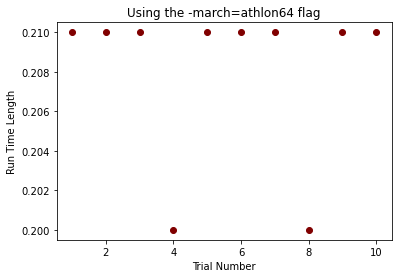

In [20]:
times_marcha = [0.210000, 0.210000, 0.210000, 0.200000, 0.210000, 0.210000, 0.210000, 0.200000, 0.210000, 0.210000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_marcha, c = 'maroon')
plt.title("Using the -march=athlon64 flag")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_marcha)))

#### Option 5 Time Graph

The average run time is 0.182 seconds


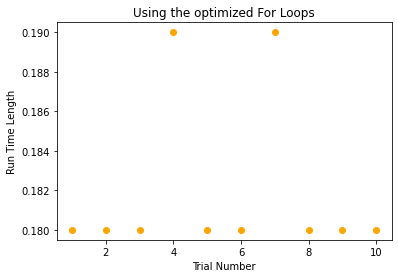

In [5]:
times_opt = [0.180000, 0.180000, 0.180000, 0.190000, 0.180000, 0.180000, 0.190000, 0.180000, 0.180000, 0.180000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_opt, c = 'orange')
plt.title("Using the optimized For Loops")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_opt)))

## OpenMP Speedup


* #pragma omp parallel for 


* #pragma omp parallel for collapse(2) with optimized code



* #pragma omp parallel with schedule(dynamic, 2)


* #pragma omp parallel with schedule(static, 2)




Show your timing results as either a table or a graph.

#### Option 1 Time Graph

The average run time is 0.198 seconds


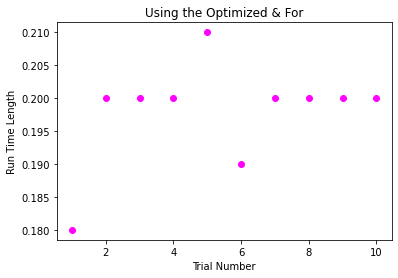

In [6]:
times_optfor = [0.180000, 0.200000, 0.200000, 0.200000, 0.210000, 0.190000, 0.200000, 0.200000, 0.200000, 0.200000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_optfor, c = 'magenta')
plt.title("Using the Optimized & For")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_optfor)))

#### Option 2 Time Graph

The average run time is 0.189 seconds


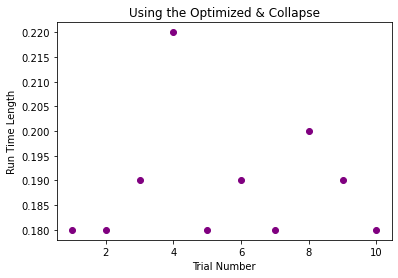

In [7]:
times_optcol = [0.180000, 0.180000, 0.190000, 0.220000, 0.180000, 0.190000, 0.180000, 0.200000, 0.190000, 0.180000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_optcol, c = 'purple')
plt.title("Using the Optimized & Collapse")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_optcol)))

#### Option 3 Time Graph

The average run time is 0.19 seconds


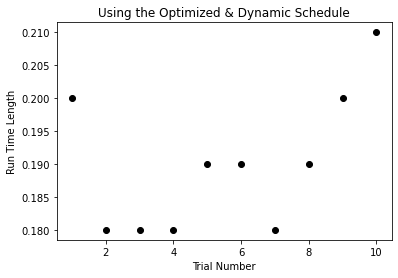

In [11]:
times_optsch_dy = [0.200000, 0.180000, 0.180000, 0.180000, 0.190000, 0.190000, 0.180000,  0.190000, 0.200000, 0.210000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_optsch_dy, c = 'black')
plt.title("Using the Optimized & Dynamic Schedule")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_optsch_dy)))

#### Option 4 Time Graph

The average run time is 0.186 seconds


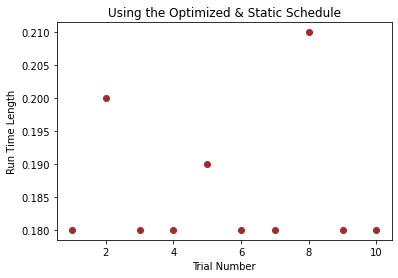

In [12]:
times_optsch_st = [0.180000, 0.200000, 0.180000, 0.180000, 0.190000, 0.180000, 0.180000, 0.210000, 0.180000, 0.180000]
test = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(test, times_optsch_st, c = 'brown')
plt.title("Using the Optimized & Static Schedule")
plt.xlabel("Trial Number")
plt.ylabel("Run Time Length")

print("The average run time is {} seconds".format(mean(times_optsch_st)))

________________________________________________________________________________________________________________________

## Concluding Discussion

--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------

   In the process of running the serial code, I learned how to manipulate a makefile and the syntax of how they work. The 

serial test average run time is 0.192. I calculated this average by running 10 time tests. The time test consisted of 

running the `make clean` and `make test` commands over and over again. From there I put the times into a list and used that 

list to plot the times on a scatter plot. This is the method I consistently used for the optimization and OpenMP section. 

From running that baseline, after loading the correct modules, I discovered the most well known way to optimize the code 

that didnt involve OpenMP was using different flags. The flags that were the most successful were the -O flags. As expected 

-OFast holds up to its name with an average runtime of *0.06*. Among all test, this flag allowed for a run time decrease of 

68.75% as calculated below. The second best was the -O1 flag with a time of *0.07*. 


----------------------------------------------------------------------------------------------------------------



   Both flags outperformed the other flag options such as -march=native and -march=athlon64. Both flags performed slower 

than just running the code in serial. Optimizing the for loops turned out to be better than using the march flags because 

it decreased the time from 0.192 seconds to 0.182 seconds. I was extremely surprised how the OpenMP did little work with 

run time reduction. It was extremely odd how when you just use #pragma omp parallel for, it increased the average run time 

by approximately 0.006 seconds. I assume it is because it is another line of code for the program to run and does not do 

any fundamental changes to the code. It seems that in order for `#pragma omp parallel for` to have significance, you need 

to follow for with either `collapse(2)` or `schedule`. 


-------------------------------------------------------------------------------------------------------------------------


   The function of collapse on the for loops allows for the nested for loops to be combine and iterated through in a 
 
scheduled clause. This technique worked well in decreasing run time with a decrease of 1.5%. Not as efficient as -Ofast 
 
but did decrease run time. The next technique with OpenMP is to use schedule. I wanted to see what the difference between 

schedule(static) and schedule(dynamic) would do for the runtime. It is important to note that when I ran schedule (both 

static & dynamnic) I did not revert the for loop order back to its original serial code. That could explain why there is 

such a beneficial decrease in run time. Therefore, when running the schedule, it is important to have optimized code in 

order for schedule to be efficient in decreasing run time. After evaluating the time tests, it is clear to see that 

schedule(static) worked more efficiently in decreaseing run time compared to schedule(dynamic). This is because schedules 

are fixed before execution in static scheduling. Dynamic plans during run time so that scheduling will take up run time. 

That scheduling difference allows for a 3% decrease in run time compared to dynamic which has only approximately a 1% 

decrease in run time. 

-----------------------------------------------------------------------------------------------------------------------

The big take aways from this assignment is that flags set within the makefile are extremely efficient 

in reducing the run time of a program. Parallel OpenMP techniques do work to decrease run time, however, it appears that it 

crucial to understand how the for loops affect run time in order to know what commands after `#pragma omp parallel for`. 

#### Code to calculate decrease in run time for -Ofast

In [21]:
orig = 0.192
new = 0.06
orig_d = orig-new
decrease_perc = (orig_d/ orig)*100
decrease_perc

68.75

#### Code to calculate decrease in run time for collapse(2)

In [23]:
orig = 0.192
new = 0.189
orig_d = orig-new
decrease_perc = (orig_d/ orig)*100
decrease_perc

1.5625000000000013

#### Code to calculate decrease in run time for schedule(dynamic)

In [24]:
orig = 0.192
new = 0.190
orig_d = orig-new
decrease_perc = (orig_d/ orig)*100
decrease_perc

1.0416666666666676

#### Code to calculate decrease in run time for schedule(static)

In [25]:
orig = 0.192
new = 0.186
orig_d = orig-new
decrease_perc = (orig_d/ orig)*100
decrease_perc

3.1250000000000027

----